In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cancer Dataset

In [4]:
dataset1=pd.read_csv('gene_expression.csv')
dataset1

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [5]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [6]:
percent_nan = percent_missing(dataset1)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

ValueError: min() arg is an empty sequence

This means that the dataset is without missing data

In [ ]:
X = dataset1.drop('Cancer Present',axis=1)
y = dataset1['Cancer Present']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

In [ ]:
log_model.coef_

In [8]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [9]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:

test_errors = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_errors.append(test_error)

In [ ]:
test_errors

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21,1))

As can be seen here minimum error is at k=19 with error=0.073

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(scaled_X_train,y_train)
y_pred_test = knn_model.predict(scaled_X_test)

In [ ]:
print(classification_report(y_test,y_pred_test))

SVM

In [10]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(kernel='linear', C=100)
svc_model.fit(scaled_X_train, y_train)

In [ ]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=scaled_X_train[:,0],
                y=scaled_X_train[:,1],
                hue=y_train,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)

In [ ]:
y_pred_svm=svc_model.predict(scaled_X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

In [ ]:
svm_model_rbf = SVC(kernel='rbf', C=100)
svm_model_rbf.fit(scaled_X_train, y_train)

In [ ]:
y_pred_svm_rbf = svm_model_rbf.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_rbf))

In [ ]:
svm_model_poly = SVC(kernel='poly', C=100,degree=3)
svm_model_poly.fit(scaled_X_train, y_train)

In [ ]:
y_pred_svm_poly = svm_model_poly.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_poly))

As can be seen, the evaluation metrics are highest when using rbf kernel, so it is the best SVM Model

As for the best from logistic, knn and svm, svm and knn withk=19 have the same accuracy and f1-score 93%

Income Dataset

In [11]:
dataset2=pd.read_csv('train.csv')
dataset2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


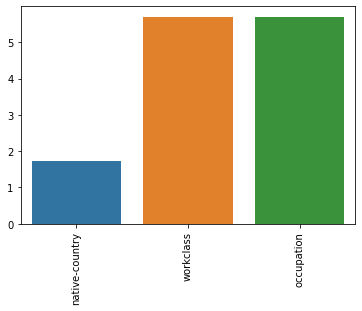

In [12]:
percent_nan = percent_missing(dataset2)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

In [13]:
dataset2['native-country'].fillna(value=dataset2['native-country'].mode()[0],inplace=True)

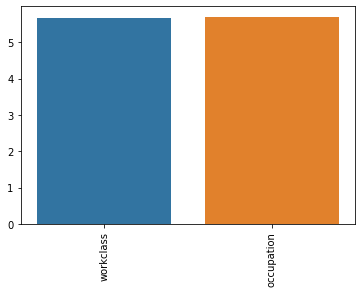

In [14]:
percent_nan = percent_missing(dataset2)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

Observation: whenever there are missing values in work class, the value of the occupation is also missing.
So it's better to drop the rows rather than imputing them

In [15]:
dataset_cleaned=dataset2.dropna(axis=0)
dataset_cleaned

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [16]:
percent_nan = percent_missing(dataset_cleaned)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

ValueError: min() arg is an empty sequence

This means that the dataset now doesn't contain any missing values

In [17]:
df_nums=dataset_cleaned.select_dtypes(exclude='object')
df_objs = dataset_cleaned.select_dtypes(include='object')

In [18]:
from sklearn import preprocessing

In [19]:


label_encoder=preprocessing.LabelEncoder()
df_objs['education']=label_encoder.fit_transform(df_objs['education'])

df_objs['occupation']=label_encoder.fit_transform(df_objs['occupation'])
df_objs['workclass']=label_encoder.fit_transform(df_objs['workclass'])
df_objs['marital-status']=label_encoder.fit_transform(df_objs['marital-status'])
#df_objs['relationship']=label_encoder.fit_transform(df_objs['relationship'])
#df_objs['race']=label_encoder.fit_transform(df_objs['race'])
df_objs['gender']=label_encoder.fit_transform(df_objs['gender'])
df_objs['native-country']=label_encoder.fit_transform(df_objs['native-country'])

df_objs

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,2,10,0,3,Not-in-family,White,1,38
1,2,2,4,7,Own-child,White,1,38
2,2,9,2,3,Husband,White,1,38
3,5,5,2,13,Husband,White,1,38
4,5,15,4,7,Not-in-family,Black,1,38
...,...,...,...,...,...,...,...,...
43952,2,9,2,3,Husband,White,1,38
43953,2,11,4,7,Own-child,White,0,38
43954,2,15,0,11,Not-in-family,White,1,38
43955,2,9,4,11,Not-in-family,White,0,38


In [20]:

df_objs_final=pd.get_dummies(df_objs[['relationship','race']],drop_first=True)
#df_objs_final=df_objs_one_hot[['relationship_Husband','relationship_Not-in-family','relationship_Other-relative','relationship_Own-child','relationship_Unmarried','relationship_Wife','gender_Male','native-country_United-States','race_White','race_Black','race_Amer-Indian-Eskimo','race_Asian-Pac-Islander']]
df_objs_final

,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
43952,0,0,0,0,0,0,0,0,1
43953,0,0,1,0,0,0,0,0,1
43954,1,0,0,0,0,0,0,0,1
43955,1,0,0,0,0,0,0,0,1


In [21]:
df_objs.drop(columns=['relationship','race'],axis=1,inplace=True)
df_objs

,workclass,education,marital-status,occupation,gender,native-country
0,2,10,0,3,1,38
1,2,2,4,7,1,38
2,2,9,2,3,1,38
3,5,5,2,13,1,38
4,5,15,4,7,1,38
...,...,...,...,...,...,...
43952,2,9,2,3,1,38
43953,2,11,4,7,0,38
43954,2,15,0,11,1,38
43955,2,9,4,11,0,38


In [22]:
final_df=pd.concat([df_nums,df_objs,df_objs_final],axis=1)
final_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass,education,marital-status,...,native-country,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,67,366425,16,99999,0,60,1,2,10,0,...,38,1,0,0,0,0,0,0,0,1
1,17,244602,8,0,0,15,0,2,2,4,...,38,0,0,1,0,0,0,0,0,1
2,31,174201,13,0,0,40,1,2,9,2,...,38,0,0,0,0,0,0,0,0,1
3,58,110199,4,0,0,40,0,5,5,2,...,38,0,0,0,0,0,0,0,0,1
4,25,149248,10,0,0,40,0,5,15,4,...,38,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,2,9,2,...,38,0,0,0,0,0,0,0,0,1
43953,19,116562,9,0,0,40,0,2,11,4,...,38,0,0,1,0,0,0,0,0,1
43954,30,197947,10,0,0,58,0,2,15,0,...,38,1,0,0,0,0,0,0,0,1
43955,46,97883,13,0,0,35,0,2,9,4,...,38,1,0,0,0,0,0,0,0,1


In [23]:
X = final_df.drop('income_>50K',axis=1)
y = final_df['income_>50K']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Logistic Regression

In [25]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [26]:
y_pred = log_model.predict(scaled_X_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3119
           1       0.70      0.56      0.62      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.74      0.76      4146
weighted avg       0.82      0.83      0.82      4146



KNN

In [28]:
test_errors = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_errors.append(test_error)

([<matplotlib.axis.XTick at 0x21981dc9a30>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

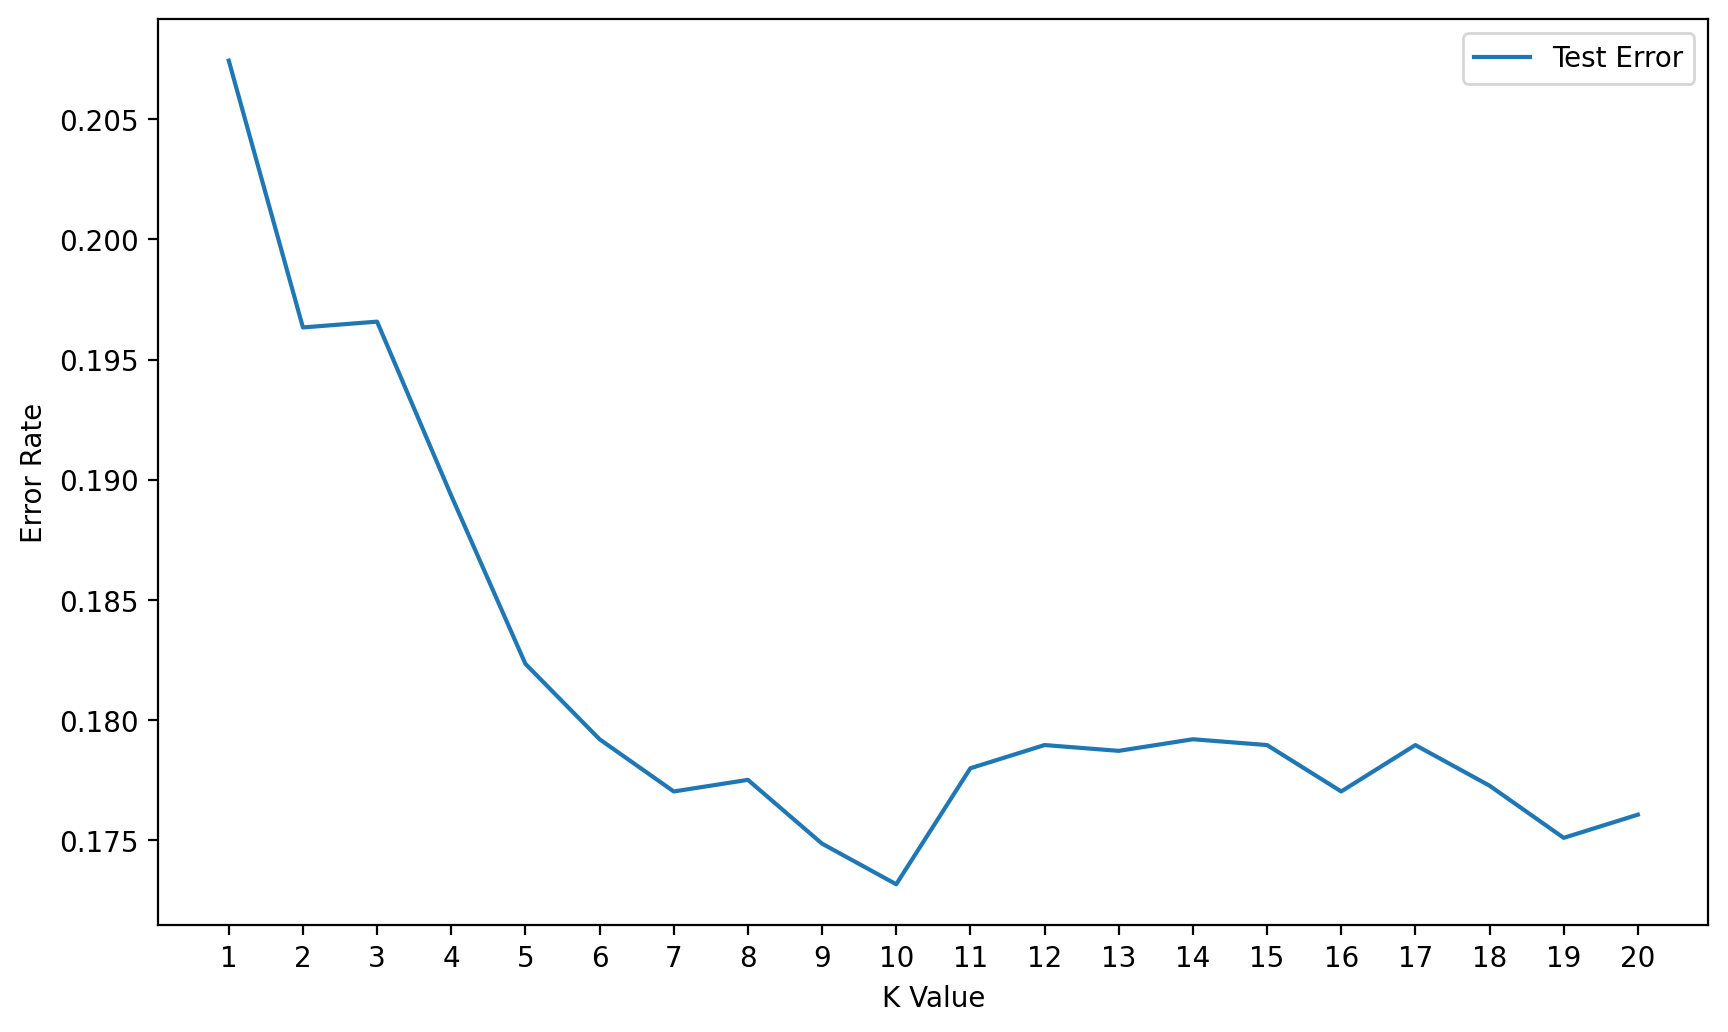

In [29]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21,1))

So the min error is at k=10

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(scaled_X_train,y_train)
y_pred_test = knn_model.predict(scaled_X_test)

In [31]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3119
           1       0.70      0.52      0.60      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.72      0.74      4146
weighted avg       0.82      0.83      0.82      4146



SVM

In [32]:
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(scaled_X_train, y_train)

SVC(C=1, kernel='linear')

In [33]:
y_pred_svm=svc_model.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3119
           1       0.69      0.56      0.62      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.74      0.75      4146
weighted avg       0.82      0.83      0.82      4146



In [34]:
svm_model_rbf = SVC(kernel='rbf', C=1)
svm_model_rbf.fit(scaled_X_train, y_train)

SVC(C=1)

In [35]:
y_pred_svm_rbf=svm_model_rbf.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3119
           1       0.72      0.56      0.63      1027

    accuracy                           0.84      4146
   macro avg       0.79      0.74      0.76      4146
weighted avg       0.83      0.84      0.83      4146



In [36]:
svm_model_poly = SVC(kernel='poly', C=1,degree=3)
svm_model_poly.fit(scaled_X_train, y_train)

SVC(C=1, kernel='poly')

In [37]:
y_pred_svm_poly=svm_model_poly.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3119
           1       0.73      0.52      0.61      1027

    accuracy                           0.83      4146
   macro avg       0.80      0.73      0.75      4146
weighted avg       0.83      0.83      0.82      4146

